In [90]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn.linear_model

data = np.loadtxt("notas_andes.dat", skiprows=1)
Y = data[:,4]
X = data[:,:4]

incertidumbre_datos = 0.1

wk = 2/incertidumbre_datos**2

mat_p_q = np.zeros(5)

for i in range(4):
    mat_p_q[i] = np.sum(X[:,i]*wk*Y)

mat_p_q[-1] = np.sum(wk*Y)


mat_a_b_gamma = np.zeros([5,5])

for i in range(4):
    previo = wk*X[:,i]
    mat_a_b_gamma[i,-1] = np.sum(previo)
    mat_a_b_gamma[-1,i] = mat_a_b_gamma[i,-1]
    mat_a_b_gamma[-1,-1] = wk * 69
    for j in range(4):
        mat_a_b_gamma[i,j] = np.sum(previo*X[:,j])
   
betas = np.dot(mat_p_q, np.linalg.inv(mat_a_b_gamma))    

covarianza = 2 * np.linalg.inv(mat_a_b_gamma)
varianza = np.diagonal(covarianza)
print('beta 0 = %f $\pm$ %f'%(betas[-1], varianza[-1]))
for i in range(1,5):
    print('beta %s = %f $\pm$ %f'%(str(i),betas[i-1], varianza[i-1]))
print
S2 = 1/68 * np.sum((np.sum(betas[:-1]*X, axis = 1)+betas[-1]-Y)**2)

beta 0 = 1.684689 $\pm$ 0.014605
beta 1 = 0.116594 $\pm$ 0.001073
beta 2 = 0.135227 $\pm$ 0.000937
beta 3 = 0.126479 $\pm$ 0.000507
beta 4 = 0.215780 $\pm$ 0.000660


In [2]:
betas

array([0.1165936 , 0.13522695, 0.12647924, 0.21578014, 1.68468859])

In [3]:
np.diagonal(covarianza)

array([0.0010732 , 0.00093746, 0.0005068 , 0.0006599 , 0.0146045 ])

In [58]:
x_walk = 0 #this is an empty list to keep all the steps
x_0 = 8.0*((np.random.random())-0.5) #this is the initialization
x_walk = np.append(x_walk,x_0)

def model(x,b1,b2,b3,b4,b0):
    return np.sum([b1,b2,b3,b4]*x, axis = 1)+b0 

def loglikelihood(x_obs, y_obs, sigma_y_obs, b1,b2,b3,b4,b0):
    d = y_obs -  model(x_obs,b1,b2,b3,b4,b0)
    d = d/sigma_y_obs
    d = -0.5 * np.sum(d**2)
    return d

def logprior(b1,b2,b3,b4, b0):
    p = -np.inf
    if b1 < 1 and b1 >0 and b2 >0 and b2<1 and b3 >0 and b3<1 and b4 >0 and b4<1 and b0 >0 and b0<2 :
        p = 0.0
    return p



In [83]:
N = 20000
x_obs = X
y_obs = Y
sigma_y_obs = 0.1
lista_b1 = [np.random.random()]
lista_b2 = [np.random.random()]
lista_b3 = [np.random.random()]
lista_b4 = [np.random.random()]
lista_b0 = [np.random.random()]
logposterior = [loglikelihood(x_obs, y_obs, sigma_y_obs, lista_b1[0],lista_b2[0],lista_b3[0],lista_b4[0],lista_b0[0]) + logprior(lista_b1[0],lista_b2[0],lista_b3[0],lista_b4[0],lista_b0[0])]

sigma_delta_b1 = 0.005
sigma_delta_b2 = 0.005
sigma_delta_b3 = 0.005
sigma_delta_b4 = 0.005
sigma_delta_b0 = 0.01

for i in range(1,N):
    propuesta_b1  = lista_b1[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b1)
    propuesta_b2  = lista_b2[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b2)
    propuesta_b3  = lista_b3[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b3)
    propuesta_b4  = lista_b4[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b4)
    propuesta_b0  = lista_b0[i-1] + np.random.normal(loc=0.0, scale=sigma_delta_b0)

    logposterior_viejo = loglikelihood(x_obs, y_obs, sigma_y_obs, lista_b1[i-1],lista_b2[i-1],lista_b3[i-1],lista_b4[i-1],lista_b0[i-1])  + logprior(lista_b1[i-1],lista_b2[i-1],lista_b3[i-1],lista_b4[i-1],lista_b0[i-1])
    logposterior_nuevo = loglikelihood(x_obs, y_obs, sigma_y_obs, propuesta_b1,propuesta_b2,propuesta_b3,propuesta_b4,propuesta_b0)  + logprior(propuesta_b1,propuesta_b2,propuesta_b3,propuesta_b4,propuesta_b0)


    r = min(1,np.exp(logposterior_nuevo-logposterior_viejo))
    alpha = np.random.random()
    if(alpha<r):
        lista_b1.append(propuesta_b1)
        lista_b2.append(propuesta_b2)
        lista_b3.append(propuesta_b3)
        lista_b4.append(propuesta_b4)
        lista_b0.append(propuesta_b0)
        logposterior.append(logposterior_nuevo)
    else:
        lista_b1.append(lista_b1[i-1])
        lista_b2.append(lista_b2[i-1])
        lista_b3.append(lista_b3[i-1])
        lista_b4.append(lista_b4[i-1])
        lista_b0.append(lista_b0[i-1])
        logposterior.append(logposterior_viejo)
lista_b1 = np.array(lista_b1)
lista_b2 = np.array(lista_b2)
lista_b3 = np.array(lista_b3)
lista_b4 = np.array(lista_b4)
lista_b0 = np.array(lista_b0)
logposterior = np.array(logposterior)

/srv/conda/envs/notebook/lib/python3.7/site-packages/ipykernel_launcher.py:29: RuntimeWarning: overflow encountered in exp


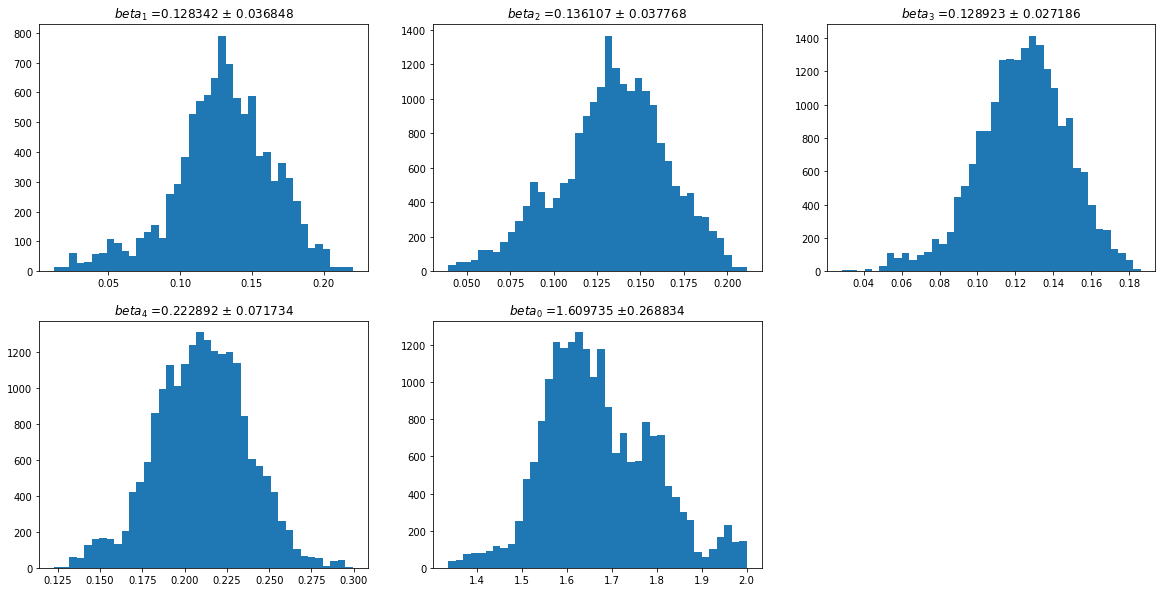

In [85]:
plt.figure(figsize=(20,10))
plt.subplot(231)
plt.hist(lista_b1[-10000:], bins = 40)
plt.title('$beta_1$ =%f $\pm $ %f'%(np.mean(lista_b1),np.std(lista_b1)))
plt.subplot(232)
plt.hist(lista_b2[10000:],bins = 40)
plt.title('$beta_2$ =%f $\pm $ %f'%(np.mean(lista_b2),np.std(lista_b2)))
plt.subplot(233)
plt.hist(lista_b3[10000:],bins = 40)
plt.title('$beta_3$ =%f $\pm $ %f'%(np.mean(lista_b3),np.std(lista_b3)))
plt.subplot(234)
plt.hist(lista_b4[10000:],bins = 40)
plt.title('$beta_4$ =%f $\pm $ %f'%(np.mean(lista_b4),np.std(lista_b4)))
plt.subplot(235)
plt.hist(lista_b0[10000:],bins = 40)
plt.title('$beta_0$ =%f $\pm $%f'%(np.mean(lista_b0),np.std(lista_b0)))


plt.savefig('ajuste_bayes_mcmc.png')
